In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('./spam.csv', encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
# Drop the unnecessary colums
data.dropna(how="any", inplace=True, axis=1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# Change column names
data.columns = ['label', 'messages']
data

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


data.messages[2]

In [8]:
data.messages[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [9]:
data.shape

(5572, 2)

In [10]:
# Check for any null value
data.isnull().sum()

label       0
messages    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
data.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ham Cases:  4825
Spam Cases:  747


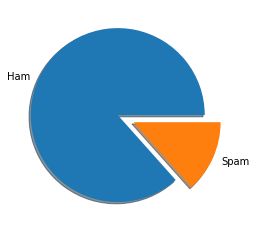

In [14]:
len_ham = len(data[(data.label == 'ham')])
len_spam = len(data[(data.label == 'spam')])

print("Ham Cases: ", len_ham)
print("Spam Cases: ", len_spam)

arr = [len_ham, len_spam]
labels = ['Ham', 'Spam']

plt.pie(arr, labels=labels, explode=[0,0.2], shadow=True)
plt.show()

In [15]:
def text_preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will") 
    return x  

data["Preprocessed Text"] = data["messages"].apply(lambda x: text_preprocess(x))
data.head()

,label,messages,Preprocessed Text
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."


In [16]:
print(data.messages[4])
print(data["Preprocessed Text"][4])

Nah I don't think he goes to usf, he lives around here though
nah i do not think he goes to usf, he lives around here though


In [17]:
data["label"] = data.label.map({'ham':0, 'spam':1})
data.head()

,label,messages,Preprocessed Text
0,0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."


In [62]:
from sklearn.model_selection import train_test_split

X = data.messages
y= data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [63]:
print("No. of rows in total set: ", data.shape[0])
print("No. of rows in training set: ", X_train.shape[0])
print("No. of rows in testing set: ", X_test.shape[0])

No. of rows in total set:  5572
No. of rows in training set:  4179
No. of rows in testing set:  1393


In [20]:
# Convert text to numbers
from sklearn.feature_extraction.text import CountVectorizer 
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [21]:
training_data

<4179x7532 sparse matrix of type '<class 'numpy.int64'>'
	with 55800 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train) 

MultinomialNB()

In [23]:
predictions = naive_bayes.predict(testing_data) 
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions))) 
print('Precision score: ', format(precision_score(y_test, predictions))) 
print('Recall score: ', format(recall_score(y_test, predictions))) 
print('F1 score: ', format(f1_score(y_test, predictions))) 

Accuracy score:  0.9870782483847811
Precision score:  0.9550561797752809
Recall score:  0.9444444444444444
F1 score:  0.9497206703910613


Testing the Model

In [31]:
trial = pd.Series("This is the 3rd time we have tried to contact Jack")
test = count_vector.transform(trial)
test1 = naive_bayes.predict(test) # this is ham
test1

array([0])

In [32]:
trial = pd.Series("Dear Investor,With reference to NSE circular NSE/INSP/46704 dated December 17, 2020 and NSE/INSP/46960 dated January 08, 2021, Stock Brokers are required to upload clients fund balance and securities balance on weekly basis.")
test = count_vector.transform(trial)
test2 =naive_bayes.predict(test) # this is spam
test2

array([1])

In [47]:
trial = pd.Series("pleaes register now")
test = count_vector.transform(trial)
test3 =naive_bayes.predict(test) # this is spam
test3

array([1])

In [58]:
trial = pd.Series("Hello, buy the chance")
test = count_vector.transform(trial)
test4 =naive_bayes.predict(test) # this is spam
test4

array([0])